In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

In the code below we are gonna get the picture from user and demonstrate it by matplotlib library for get the image we can use open_cv library whitch is programmed for CV.

(225, 225, 3)
225 225 50625


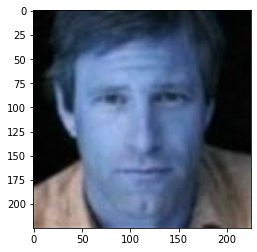

In [27]:
# at first we get our picyure with imread function in open cv library
imag = cv2.imread("nature.jpg")
plt.imshow(imag)
print(imag.shape)
width = imag.shape[0]
hieght = imag.shape[1]
lenth = width * hieght
print(width , hieght , lenth)

Here we make a histogram by Gussian kernel .as we have a RGB pictuer we define 3 types of X for
each channel .you can see its histogram under the code .we use this formula to creat this histogram

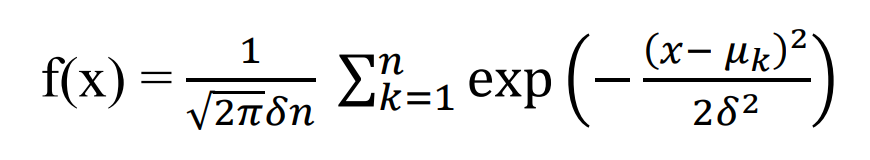

[5.20840950e-03 5.21453419e-03 5.22065162e-03 ... 9.32031878e-29
 9.16271243e-29 9.00774429e-29]


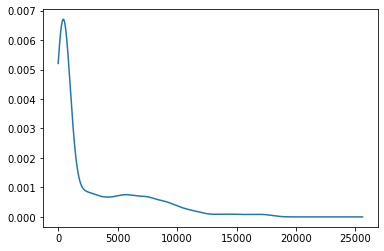

In [28]:
# here we want to calculate the histogram of the picture 
sigma = 10

xr = np.arange(0 ,256 , 0.01)
xg = np.arange(0 ,256 , 0.01)
xb = np.arange(0 ,256 , 0.01)
a = 1/(np.sqrt(2*np.pi)*(lenth)*sigma)
sum = 0
for i in range(width) :
    for j in range(hieght):
        
            sum += np.exp(-((xr - imag[i][j][0])**2 + (xg - imag[i][j][1])**2 + (xb - imag[i][j][2])**2)/ (2 * (sigma**2)))

            
plt.plot(sum*a)
print(sum*a)



In theory if we want to find the peaks we should consider all of the data but beacuse of heigh 
complexity-computation we consier a sample of data(for example 10)and find the peaks.here we get 10 
seeds randomly .

In [29]:
number_of_seeds = 10
seed_list_x = np.random.choice(imag.shape[0], number_of_seeds, replace=False) 
seed_list_y = np.random.choice(imag.shape[1], number_of_seeds, replace=False) 
print(seed_list_x)
print(seed_list_y)

[149 156  74 182  87 120  50 129  73  78]
[204 172 151  31  28  30 113  92 224 106]


you can see the seeds here:we use these 10 data insted of all .

In [30]:
for l in range(10) : 
    print(imag[seed_list_x[l]][seed_list_y[l]])

[61 64 62]
[39 48 58]
[ 80 103 149]
[132 113 105]
[111 132 160]
[13 17 35]
[118 154 208]
[154 177 225]
[5 5 5]
[145 173 227]


here we implement the mean_sheft algorithm . As you can see, we derived the formula and shift the
seeds until reaching the peak.here we define three variable for shifting xr,xg and xb  and we  
calculate the new point for each of them .

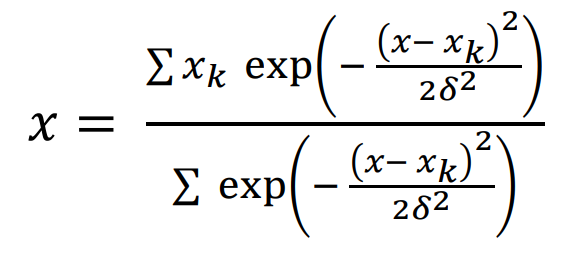

In [31]:
result = []
for i in range(number_of_seeds) :
    peak = []
    shift_r = imag[seed_list_x[i]][seed_list_y[i]][0]
    shift_g = imag[seed_list_x[i]][seed_list_y[i]][1]
    shift_b = imag[seed_list_x[i]][seed_list_y[i]][2]
    for h in range(5):

        w = 0 
        xr = 0 
        xg = 0
        xb = 0
        for j in range(width) : 
            for  k in range(hieght) :
                p = np.exp(-((shift_r - imag[j][k][0])**2 + (shift_g  - imag[j][k][1])**2 + (shift_b - imag[j][k][2])**2)/ (2 * (sigma**2)))
                xr += imag[j][k][0]* p
                xg += imag[j][k][1]*p
                xb += imag[j][k][2]*p
                w += p
        
        shift_r =  xr / w
        shift_g = xg / w
        shift_b = xb / w
    peak.append(shift_r)
    peak.append(shift_g)
    peak.append(shift_b)
    result.append(peak)

C:\Users\Soroush\AppData\Local\Temp\ipykernel_16816\3827893852.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  p = np.exp(-((shift_r - imag[j][k][0])**2 + (shift_g  - imag[j][k][1])**2 + (shift_b - imag[j][k][2])**2)/ (2 * (sigma**2)))


In [32]:
print(len(result))

for pp in range(10 ) :
     print(int(result[pp][0]) , int(result[pp][1]) , int(result[pp][2]))

10
40 53 69
30 43 57
71 94 139
116 105 101
96 123 170
3 4 4
120 149 197
137 166 217
3 4 4
134 164 215


Here we use a K_means clusternig to cluster thease 10 points into 3 clusters . we can find out from the histogram that our image has three peaks .

In [33]:
from sklearn.cluster import KMeans

numbers_of_clusters = 3
kmeans = KMeans(n_clusters=3)
data = np.array(result)
kmeans.fit(data)
print(kmeans.labels_)

[0 0 2 2 2 0 1 1 0 1]


In [34]:
def get_distance(input1 , input2):
    x1 = input1[0]
    x2 = input1[1]
    x3 = input1[2]
    
    y1 = input2[0]
    y2 = input2[1]
    y3 = input2[2]
    
    dis  = np.sqrt((x1-y1)**2 + (x2-y2)**2 + (x3 - y3)**2)
    return dis
    

In [35]:
import math
segment = np.array(imag)

and here we itrate the pixels and calculate the closest data point from the cluster centers and assign that value of the  cluster center to this pixel.

In [36]:
cluster_center = kmeans.cluster_centers_
for i in range (width) :
    for j in range(hieght) :
        min = math.inf
        index = -1
        for k in range(0 ,len(cluster_center)) :
            dis = get_distance(cluster_center[k] , segment[i][j])
            if dis < min :
                min = dis
                index = k
        segment[i][j] =  cluster_center[index]       
        

and here you can see the picture after segentation .

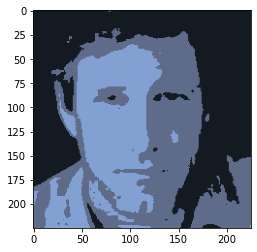

In [38]:
plt.imshow(segment)